# Billboard
## Breaking Down The Pop Song


In [30]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import numpy as np
import nltk
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42 #makes text editable in illustrator

%matplotlib inline

In [4]:
df = pd.read_csv("billboard_lyrics_1964-2015.csv", encoding='latin-1')

In [8]:
df.dtypes

Rank        int64
Song       object
Artist     object
Year        int64
Lyrics     object
Source    float64
dtype: object

In [6]:
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


## Most Common Words in Pop Songs

All frequencies, including STOPWORDS:
     Word  Frequency
0     you      64606
1       i      56511
2     the      53451
3      to      35752
4     and      32555
5      me      31640
6       a      29282
7      it      25688
8      my      22821
9      in      18553
10   that      16151
11     on      15814
12   your      15459
13   love      15283
14     im      14278
15     be      13004
16     of      12825
17    all      11895
18   dont      11587
19   know      11166
20     na      11108
21   like      10949
22     so      10545
23    for      10448
24     is      10335
25     we      10331
26    got      10215
27     oh       9736
28   just       9577
29     do       9465
..    ...        ...
70    her       3993
71  right       3946
72   back       3938
73    are       3838
74   need       3735
75     at       3724
76   feel       3697
77    not       3623
78   will       3611
79  night       3598
80   aint       3592
81   tell       3444
82   from       3285
83   were       3

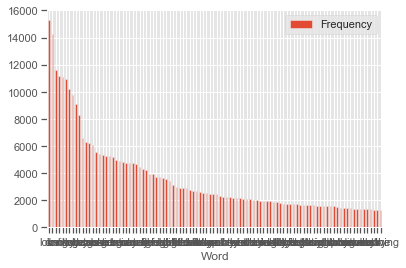

In [64]:
top_N = 100

txt = df['Lyrics'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

## Which Artists Have the Most Longevity? Who Appears the Most?

In [28]:
# Doesn't include features 
df.Artist.value_counts().head(10)

madonna            35
elton john         26
mariah carey       25
stevie wonder      22
janet jackson      22
michael jackson    22
taylor swift       19
whitney houston    19
rihanna            19
kelly clarkson     17
Name: Artist, dtype: int64

## Let's look at Mariah Carey. (She's the solo artist w/ the most #1's in history and has the longest running #1's w/ "We Belong Together" & "One Sweet Day")
### Which of her #1 singles appear on this chart?

In [14]:
df[df['Artist'] == 'mariah carey'].sort_values(by='Rank', ascending=True)

,Rank,Song,Artist,Year,Lyrics,Source
4000,1,we belong together,mariah carey,2005,ooh ooh sweet love yeahi didnt mean it when i...,1.0
2904,5,hero,mariah carey,1994,theres a hero if you look inside your heart y...,1.0
3104,5,always be my baby,mariah carey,1996,we were as one babe for a moment in time and ...,1.0
2505,6,vision of love,mariah carey,1990,treated me kind sweet destiny carried me thro...,1.0
3006,7,fantasy,mariah carey,1995,oh when you walk by every night talking sweet...,1.0
2807,8,dreamlover,mariah carey,1993,i need a lover to give me the kind of love th...,1.0
2612,13,someday,mariah carey,1991,you were so blind to let me go you had it all...,1.0
4014,15,shake it off,mariah carey,2005,i gotta shake you off cause the loving aint t...,1.0
2715,16,ill be there,mariah carey,1992,you and i must make a pact we must bring salv...,1.0
2915,16,without you never forget you,mariah carey,1994,NaN,NaN


In [61]:
mariah = df[df['Artist'] == 'mariah carey']
mariah.head()

,Rank,Song,Artist,Year,Lyrics,Source
2505,6,vision of love,mariah carey,1990,treated me kind sweet destiny carried me thro...,1.0
2575,76,love takes time,mariah carey,1990,i had it all but i let it slip away couldnt s...,1.0
2612,13,someday,mariah carey,1991,you were so blind to let me go you had it all...,1.0
2621,22,emotions,mariah carey,1991,youve got me feeling emotions deeper than ive...,1.0
2625,26,i dont wanna cry,mariah carey,1991,once again we sit in silence after all is sai...,1.0


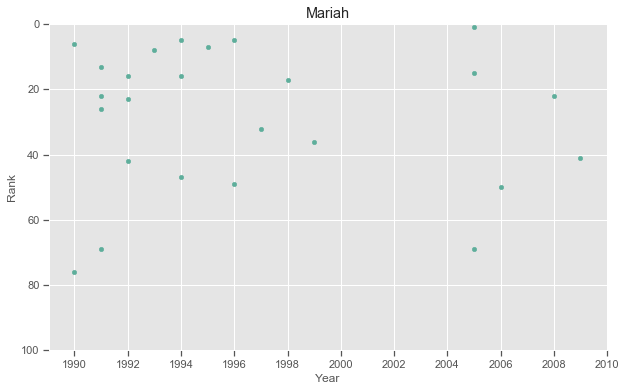

In [81]:
#Lower is better
mariah_year = mariah.sort_values(by='Year', ascending=False)
ax = mariah_year.sort_values(by='Year', ascending=True).plot(x='Year', 
           y='Rank', 
           kind='scatter', 
           figsize=(10, 6),
           title="Mariah",
           color="#5EAE9B")
ax.set_ylim(100,0)
ax.xaxis.set_ticks([1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010])
# plt.tight_layout()
# plt.savefig("Mariah.pdf")

In [29]:
# How many times does Mariah appear on the chart including features? 
# 33 times
count = 0
for name in df.Artist:
    if "mariah carey" in name:
        print(name)
        count += 1
count

mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
luther vandross and mariah carey
mariah carey
mariah carey and boyz ii men
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey featuring jayz
mariah carey
whitney houston and mariah carey
mariah carey featuring joe and 98 degrees
mariah carey featuring cameo
busta rhymes and mariah carey featuring flipmode squad
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey
mariah carey featuring miguel


33

All frequencies, including STOPWORDS:
     Word  Frequency
0     you        377
1       i        292
2     and        217
3     the        184
4      me        181
5      to        164
6      my        157
7    that        132
8      it        130
9      be        116
10     so        109
11      a        103
12     in        103
13   your         90
14   dont         89
15    its         85
16   baby         85
17     oh         82
18     on         81
19  youre         80
20   know         79
21     im         79
22   like         73
23     of         71
24    got         62
25  shake         62
26   love         61
27    all         61
28   when         60
29     na         60


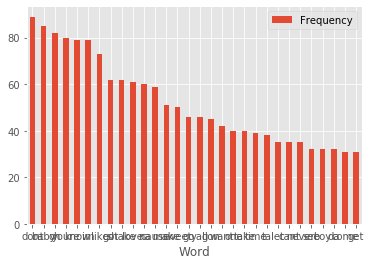

In [24]:
top_N = 30

txt = mariah['Lyrics'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)